<div style="background-color: #004d4d; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">

# **CHECKPOINT 1**

</div>

In [2]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = '#FFFFFF'  # bluish dark grey
plt.rcParams['axes.facecolor'] = '#FFFFFF' # bluish dark grey
plt.rcParams['savefig.facecolor'] = '#FFFFFF'  # bluish dark grey

plt.rcParams['legend.borderaxespad'] = 0 # separacion de legend
plt.rcParams['axes.edgecolor'] = 'k'
plt.rcParams['axes.axisbelow'] = True

plt.rcParams['legend.framealpha'] = 1
plt.rcParams['legend.facecolor'] = '212946' # bluish dark grey

for param in ['axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = 'k'  # very light grey
plt.rcParams['legend.labelcolor'] = 'w' # bluish dark grey

plt.rcParams['text.color']='k'
plt.grid(which='both', linestyle='--', color='grey')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Analisis de Lazo**
</div>

In [5]:
LazoDepTiempo = pd.read_csv("LTSpice/Lazo Dependiente de la Carga.txt", delimiter="\t")
LazoDepTiempo

,rl,V(vo),I(RL)
0,0.00,0.00,0.43
1,0.00,0.00,0.43
2,0.00,0.00,0.43
3,0.00,0.00,0.43
4,0.00,0.00,0.43
...,...,...,...
1196,954.99,5.01,0.01
1197,966.05,5.01,0.01
1198,977.24,5.01,0.01
1199,988.55,5.01,0.01


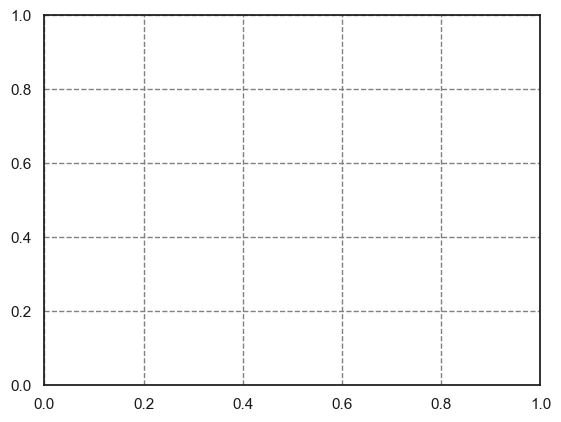

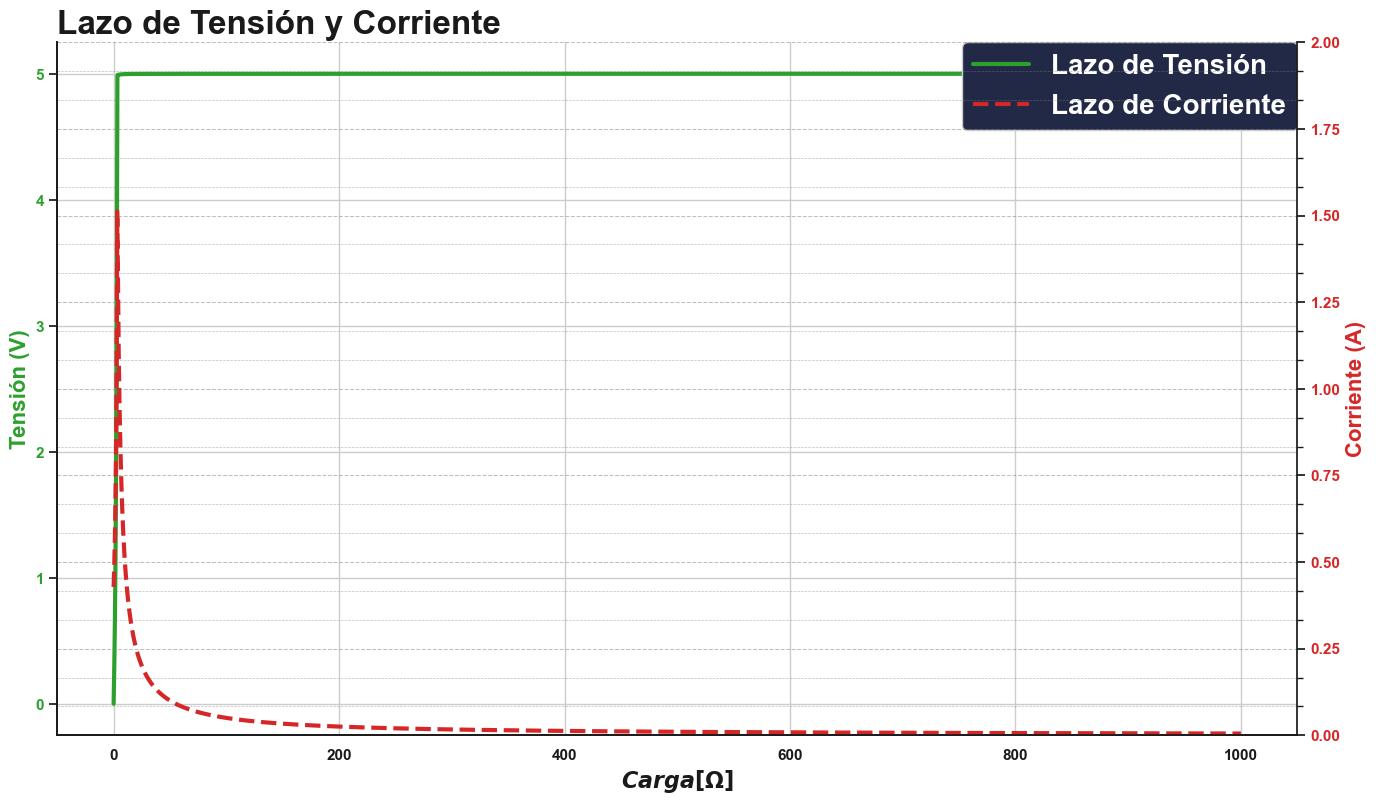

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
# Crear la figura
plt.figure(figsize=(16, 9))
ax1 = plt.gca()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))


# Etiquetas de ejes
ax1.set_xlabel("$Carga [\Omega]$", fontsize=16)
ax1.set_ylabel("Tensión (V)", fontsize=16, color="tab:green")

# Graficar tensión
line1, = ax1.plot(LazoDepTiempo["rl"], LazoDepTiempo["V(vo)"], linewidth=3, color="tab:green")
ax1.tick_params(axis="y", labelcolor="tab:green")

# Crear un segundo eje para la corriente
ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)

ax2.set_ylabel("Corriente (A)", fontsize=16, color="tab:red")
line2, = ax2.plot(LazoDepTiempo["rl"], LazoDepTiempo["I(RL)"], linewidth=3, color="tab:red", linestyle="dashed")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_yticks(np.linspace(0, 2, 25), minor=True)
ax2.set_ylim(0, 2)

# Título y grillas
plt.title("Lazo de Tensión y Corriente", fontsize=24, loc="left")
plt.grid(which="major", color="grey", linestyle="--", linewidth=0.75, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.5)

# Combinar leyendas
ax1.legend([line1, line2], ["Lazo de Tensión", "Lazo de Corriente"], loc="upper right", fontsize=20)

# Guardar con bordes ajustados
plt.savefig("Lazo_Tension_Corriente.png", bbox_inches="tight")

# Mostrar la gráfica
plt.show()


In [7]:
LazoDepTiempo.describe()

,rl,V(vo),I(RL)
count,"1,201.00","1,201.00","1,201.00"
mean,72.74,2.25,0.40
std,176.96,2.38,0.29
min,0.00,0.00,0.01
25%,0.03,0.01,0.16
50%,1.00,0.55,0.43
75%,31.62,5.00,0.46
max,"1,000.00",5.01,1.51


In [8]:
LazoDepTiempo = pd.read_csv("LTSpice/Lazo Dependiente de la Carga.txt", delimiter="\t")
LazoDepTiempo.describe()

,rl,V(vo),I(RL)
count,"1,201.00","1,201.00","1,201.00"
mean,72.74,2.25,0.40
std,176.96,2.38,0.29
min,0.00,0.00,0.01
25%,0.03,0.01,0.16
50%,1.00,0.55,0.43
75%,31.62,5.00,0.46
max,"1,000.00",5.01,1.51


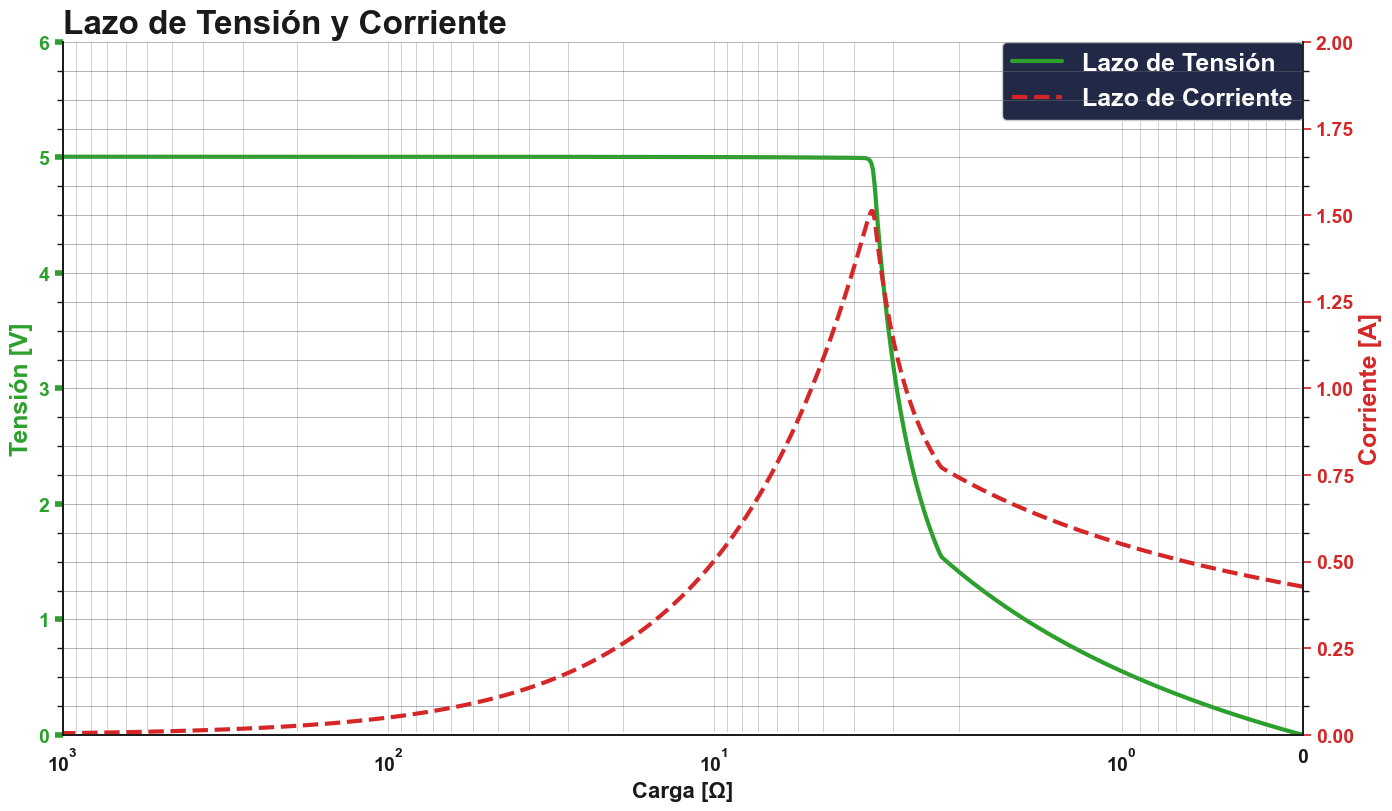

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax1.set_xscale('symlog')
ax1.tick_params(axis='both', width=4, labelsize=30)

# Configurar el eje Y de voltaje
ax1.set_yticks(np.linspace(0, 6, 25), minor=True)
ax1.set_ylim(0, 6)
ax1.set_ylabel("Tensión [V]", fontsize=18, color="tab:green")
ax1.tick_params(axis='y', labelsize=14, colors='tab:green')
ax1.tick_params(axis='x', labelsize=14)

ax1.axhline(0, linestyle='-', linewidth=4, c='white')
ax1.axvline(0, linestyle='solid', linewidth=6, c='white')

# Configurar los ticks del eje X
a = np.append(np.linspace(0, 1, 11), np.linspace(1, 10, 11))
a = np.append(a, np.linspace(10, 100, 11))
a = np.append(a, np.linspace(100, 1000, 11))

ax1.set_xticks(a, minor=True)

# Configuración de la grilla
plt.grid(which='both', color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

# Crear un segundo eje Y para la corriente
ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)

ax2.set_ylabel("Corriente [A]", fontsize=18, color='tab:red')  # Etiqueta del eje Y de corriente
ax2.set_ylim(0, np.max(LazoDepTiempo["I(RL)"]) * 1.1)  # Ajustar la escala de corriente
ax2.set_yticks(np.linspace(0, 2, 25), minor=True)
ax2.tick_params(axis='y', labelsize=14, colors='tab:red')

# Configurar título y nombre del eje X
plt.title("Lazo de Tensión y Corriente", fontsize=24, loc="left")  # Título centrado
ax1.set_xlabel("Carga [Ω]", fontsize=16)  # Nombre del eje X

# Configurar la grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="-", linewidth=0.5, alpha=0.5)

# Graficar voltaje en el primer eje
line1, = ax1.plot(LazoDepTiempo["rl"], LazoDepTiempo["V(vo)"], linestyle='-', linewidth=3, color="tab:green")

# Graficar corriente en el segundo eje
line2, = ax2.plot(LazoDepTiempo["rl"], LazoDepTiempo["I(RL)"], linestyle='--', linewidth=3, color="tab:red")

# Mostrar leyenda
ax1.legend([line1, line2], ["Lazo de Tensión", "Lazo de Corriente"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(1000, 0)
plt.savefig("Lazo_Tension_Corriente.png", bbox_inches="tight")

plt.show()


<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Regulacion de Linea**
</div>

In [12]:
RegulacionDeLinea = pd.read_csv("LTSpice/Regulacion de Linea.txt", delimiter="\t")
RegulacionDeLinea

,vin,V(vo)
0,0.00,0.00
1,0.10,0.00
2,0.20,0.00
3,0.30,0.00
4,0.40,0.00
...,...,...
296,29.60,5.05
297,29.70,5.05
298,29.80,5.05
299,29.90,5.05


In [13]:
RegulacionDeLinea

,vin,V(vo)
0,0.00,0.00
1,0.10,0.00
2,0.20,0.00
3,0.30,0.00
4,0.40,0.00
...,...,...
296,29.60,5.05
297,29.70,5.05
298,29.80,5.05
299,29.90,5.05


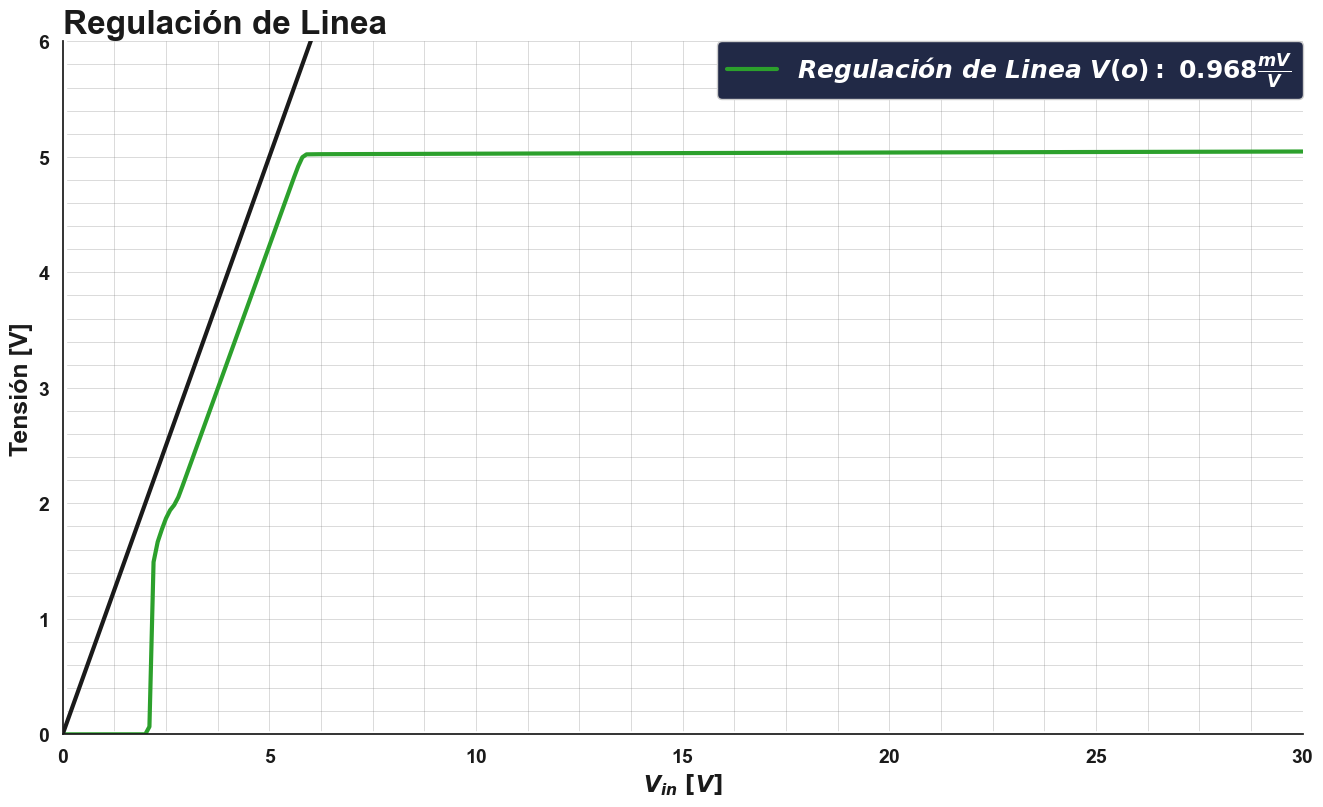

In [14]:
# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax = fig.add_subplot(1, 1, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["left"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax.tick_params(axis='both', width=4, labelsize=30)

# Configurar el eje Y de voltaje
ax.set_yticks(np.linspace(0, 6, 31), minor=True)
ax.set_xticks(np.linspace(0, 30, 25), minor=True)

ax.set_ylim(0, 6)
ax.set_ylabel("Tensión [V]", fontsize=18)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.axhline(0, linestyle='-', linewidth=4, c='white')
ax.axvline(0, linestyle='solid', linewidth=6, c='white')


# Configurar título y nombre del eje X
plt.title("Regulación de Linea", fontsize=24, loc="left")  # Título centrado
ax.set_xlabel(r"$V_{in}\ [V]$", fontsize=16)  # Nombre del eje X

# Configurar la grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.5, alpha=0.4)
plt.grid(which="minor", color="grey", linestyle="-", linewidth=0.5, alpha=0.4)


line, = ax.plot(RegulacionDeLinea["vin"], RegulacionDeLinea["V(vo)"], linestyle='-', linewidth=3, color="tab:green")
ax.plot(RegulacionDeLinea["vin"], RegulacionDeLinea["vin"], linestyle='-', linewidth=3, color="k")

# Mostrar leyenda
ax.legend([line], [r"$Regulación\ de\ Linea\ V(o):\ 0.968\frac{mV}{V}$"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(0, 30)
plt.savefig("Regulacion_de_Linea.png", bbox_inches="tight")

plt.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Regulacion de Carga**
</div>

In [16]:
RegulacionDeCarga = pd.read_csv("LTSpice/Regulacion de Carga.txt", delimiter="\t")
RegulacionDeCarga

,rl,V(vo),I(Rl)
0,0.00,0.00,0.43
1,0.00,0.00,0.43
2,0.00,0.00,0.43
3,0.00,0.00,0.43
4,0.00,0.00,0.43
...,...,...,...
356,857.70,5.01,0.01
357,891.25,5.01,0.01
358,926.12,5.01,0.01
359,962.35,5.01,0.01


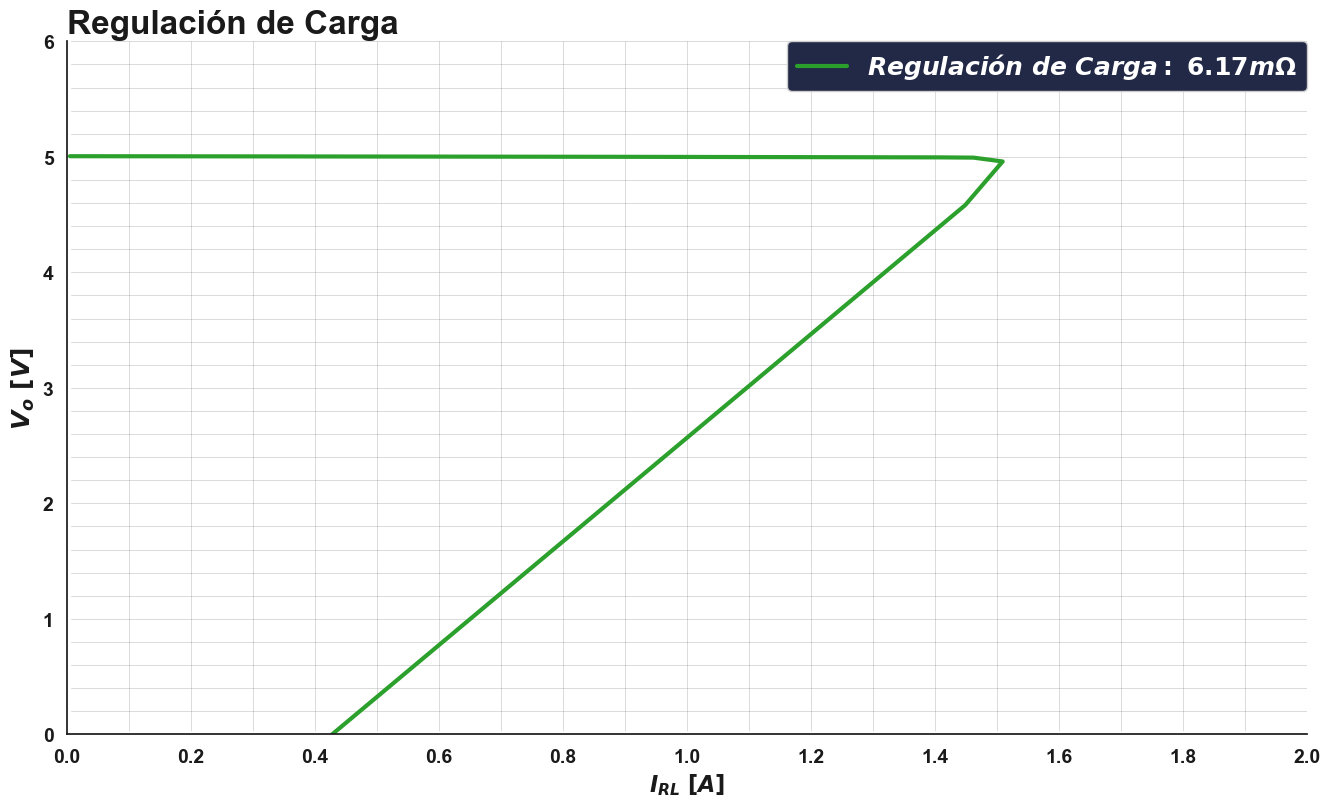

In [17]:
# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax = fig.add_subplot(1, 1, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["left"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax.tick_params(axis='both', width=4, labelsize=30)

# Configurar el eje Y de voltaje
ax.set_yticks(np.linspace(0, 6, 31), minor=True)
ax.set_xticks(np.linspace(0, 2, 21), minor=True)

ax.set_ylim(0, 6)
ax.set_ylabel(r"$V_o\ [V]$", fontsize=18)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.axhline(0, linestyle='-', linewidth=4, c='white')
ax.axvline(0, linestyle='solid', linewidth=6, c='white')


# Configurar título y nombre del eje X
plt.title("Regulación de Carga", fontsize=24, loc="left")  # Título centrado
ax.set_xlabel(r"$I_{RL}\ [A]$", fontsize=16)  # Nombre del eje X

# Configurar la grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.5, alpha=0.4)
plt.grid(which="minor", color="grey", linestyle="-", linewidth=0.5, alpha=0.4)
ax.set_xticks(np.arange(0, 2.1, 0.2))

line, = ax.plot(RegulacionDeCarga["I(Rl)"], RegulacionDeCarga["V(vo)"], linestyle='-', linewidth=3, color="tab:green")

# Mostrar leyenda
ax.legend([line], [r"$Regulación\ de\ Carga:\ 6.17m \Omega $"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(0, 2)
plt.savefig("Regulacion_de_Carga.png", bbox_inches="tight")

plt.show()

In [18]:
0.00617131*1000


6.17131

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Ganancia de Lazo**
</div>

In [75]:
GananciaDeLazo = pd.read_csv("LTSpice/Ganancia de Lazo de Tension.txt", delimiter="\t")
GananciaDeLazo.loc[GananciaDeLazo['Freq'] > 1.71132830416178, 'phase'] -= 360
GananciaDeLazo.head()

,Freq,gain,phase
0,0.10,58.55,-179.90
1,0.11,58.55,-179.91
2,0.12,58.55,-179.92
3,0.13,58.55,-179.92
4,0.14,58.55,-179.93


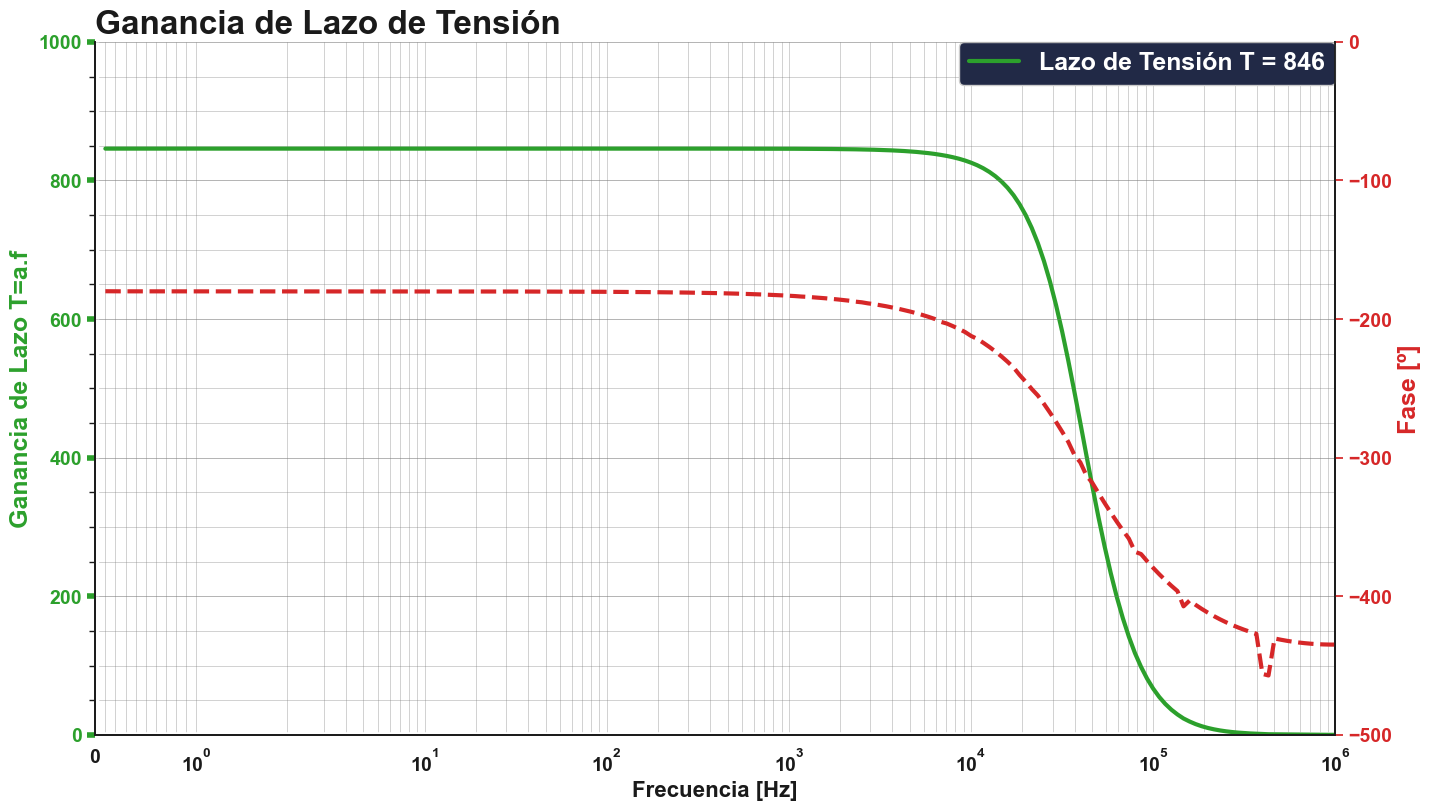

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax1.set_xscale('symlog')
ax1.tick_params(axis='both', width=4, labelsize=30)

# Configurar el eje Y de voltaje
ax1.set_yticks(np.linspace(0, 1000, 21), minor=True)
ax1.set_ylim(0, 1000)
ax1.set_ylabel("Ganancia de Lazo T=a.f", fontsize=18, color="tab:green")
ax1.tick_params(axis='y', labelsize=14, colors='tab:green')
ax1.tick_params(axis='x', labelsize=14)

ax1.axhline(0, linestyle='-', linewidth=4, c='white')
ax1.axvline(0, linestyle='solid', linewidth=6, c='white')

# Configurar los ticks del eje X
a = np.append(np.linspace(0, 1, 11), np.linspace(1, 10, 11))
a = np.append(a, np.linspace(10, 100, 11))
a = np.append(a, np.linspace(100, 1000, 11))
a = np.append(a, np.linspace(1000, 10000, 11))
a = np.append(a, np.linspace(10000, 100000, 11))
a = np.append(a, np.linspace(100000, 1000000, 11))
a = np.append(a, np.linspace(1000000, 10000000, 11))

ax1.set_xticks(a, minor=True)

# Configuración de la grilla
plt.grid(which='both', color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

# Crear un segundo eje Y para la corriente
ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)

ax2.set_ylabel("Fase [º]", fontsize=18, color='tab:red')  # Etiqueta del eje Y de corriente
#ax2.set_yticks(np.linspace(0, 2, 25), minor=True)
ax2.tick_params(axis='y', labelsize=14, colors='tab:red')
ax2.set_ylim(-500, -0)  # Ajustar la escala de corriente

# Configurar título y nombre del eje X
plt.title("Ganancia de Lazo de Tensión", fontsize=24, loc="left")  # Título centrado
ax1.set_xlabel("Frecuencia [Hz]", fontsize=16)  # Nombre del eje X

# Configurar la grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="-", linewidth=0.5, alpha=0.5)

# Graficar voltaje en el primer eje
line1, = ax1.plot(GananciaDeLazo["Freq"], 10**(GananciaDeLazo["gain"]/20), linestyle='-', linewidth=3, color="tab:green")

# Graficar corriente en el segundo eje
line2, = ax2.plot(GananciaDeLazo["Freq"], GananciaDeLazo["phase"], linestyle='--', linewidth=3, color="tab:red")

# Mostrar leyenda
ax1.legend([line1], ["Lazo de Tensión T = 846"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(0,1e6)
plt.savefig("Ganancia_de_Lazo_de_Tension.png", bbox_inches="tight")

plt.show()
